In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import map_setup
import numpy as np
import cartopy.feature as cfeature
import calendar

In [8]:
phytobase_sql = {
    "scientificName": "taxa",
    "decimalLatitude": "latitude",
    "decimalLongitude": "longitude",
}

In [9]:
phytobase_occurrence_r = pd.read_csv("../../data/datasets/unmodified/phytobase/Phytoplankton_harmonized_database_revised.csv", encoding='unicode_escape')
phytobase_occurrence_r

/var/folders/wb/v7frq16s6nnb0tkx5j8nz06r0000gn/T/ipykernel_97798/2656050941.py:1: DtypeWarning: Columns (8,10,11,13,15,16,17,18,20,21,23,24,26,27,28,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  phytobase_occurrence_r = pd.read_csv("../../data/datasets/unmodified/phytobase/Phytoplankton_harmonized_database_revised.csv", encoding='unicode_escape')


,scientificName,decimalLongitude,decimalLatitude,year,month,day,depth,depthAccuracy,taxonRank,occurrenceStatus,...,scientificNameOriginal_gbif,scientificNameOriginal_obis,scientificNameOriginal_maredat,scientificNameOriginal_villar,scientificNameOriginal_sal,organismQuantity,organismQuantityType,individualCount,yearOfDataAccess,flag
0,Carteria marina,-79.2150,-9.4820,2000,2,11.0,10.0,NaN,SPECIES,PRESENT,...,NaN,Carteria marina,NaN,NaN,NaN,NaN,NaN,NaN,2015,NONE
1,Coccopterum labyrinthus,-11.6042,40.6832,1993,5,11.0,0.0,NaN,SPECIES,PRESENT,...,Coccopterum labyrinthus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,S
2,Coccopterum labyrinthus,-11.6042,40.6832,1993,5,11.0,139.0,NaN,SPECIES,PRESENT,...,Coccopterum labyrinthus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,S
3,Coccopterum labyrinthus,-11.6042,40.6832,1993,5,11.0,181.0,NaN,SPECIES,PRESENT,...,Coccopterum labyrinthus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,S
4,Coccopterum labyrinthus,-11.6042,40.6832,1993,5,11.0,22.0,NaN,SPECIES,PRESENT,...,Coccopterum labyrinthus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360616,Picoeukaryotes,95.0100,-39.9900,1995,9,29.0,51.0,NaN,NaN,PRESENT,...,NaN,NaN,Picoeukaryotes,NaN,NaN,10463000.0,number_of_cells_per_L,NaN,2015_2017,NONE
1360617,Picoeukaryotes,95.0100,-43.0000,1995,9,28.0,0.0,NaN,NaN,PRESENT,...,NaN,NaN,Picoeukaryotes,NaN,NaN,5163000.0,number_of_cells_per_L,NaN,2015_2017,NONE
1360618,Picoeukaryotes,95.0100,-43.0000,1995,9,28.0,48.0,NaN,NaN,PRESENT,...,NaN,NaN,Picoeukaryotes,NaN,NaN,5134000.0,number_of_cells_per_L,NaN,2015_2017,NONE
1360619,Picoeukaryotes,95.0000,-31.7500,1995,10,2.0,0.0,NaN,NaN,PRESENT,...,NaN,NaN,Picoeukaryotes,NaN,NaN,10949000.0,number_of_cells_per_L,NaN,2015_2017,NONE


In [10]:
phytobase_occurrence = phytobase_occurrence_r.rename(columns=phytobase_sql)
phytobase_occurrence['source_name'] = 'phytobase'
# not filtered earlier to get maximum taxa data possible for microscopy table
# merge three columns into one with proper datetime format (no NaT)
phytobase_occurrence['date_time'] = pd.to_datetime(phytobase_occurrence[['year', 'month', 'day']], format='%m-%d-%Y',
                                        errors='coerce').dropna()
phytobase_occurrence = phytobase_occurrence.drop(columns=['year', 'month', 'day'])
phytobase_occurrence = phytobase_occurrence[phytobase_occurrence.latitude <= -30]
phytobase_occurrence

,taxa,longitude,latitude,depth,depthAccuracy,taxonRank,occurrenceStatus,phylum,class,basisOfRecord,...,scientificNameOriginal_maredat,scientificNameOriginal_villar,scientificNameOriginal_sal,organismQuantity,organismQuantityType,individualCount,yearOfDataAccess,flag,source_name,date_time
119,Coccopterum labyrinthus,-74.4499,-41.0001,0.0,NaN,SPECIES,PRESENT,Chlorophyta,Prasinophyceae,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,S,phytobase,2002-04-12
120,Coccopterum labyrinthus,-74.4499,-41.0001,1.0,NaN,SPECIES,PRESENT,Chlorophyta,Prasinophyceae,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,S,phytobase,2002-04-12
121,Coccopterum labyrinthus,-74.4499,-41.0001,10.0,NaN,SPECIES,PRESENT,Chlorophyta,Prasinophyceae,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,S,phytobase,2002-04-12
122,Coccopterum labyrinthus,-74.4499,-41.0001,11.0,NaN,SPECIES,PRESENT,Chlorophyta,Prasinophyceae,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,S,phytobase,2002-04-12
123,Coccopterum labyrinthus,-74.4499,-41.0001,12.0,NaN,SPECIES,PRESENT,Chlorophyta,Prasinophyceae,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,S,phytobase,2002-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360616,Picoeukaryotes,95.0100,-39.9900,51.0,NaN,NaN,PRESENT,NaN,NaN,FLOWCYTOMETRY,...,Picoeukaryotes,NaN,NaN,10463000.0,number_of_cells_per_L,NaN,2015_2017,NONE,phytobase,1995-09-29
1360617,Picoeukaryotes,95.0100,-43.0000,0.0,NaN,NaN,PRESENT,NaN,NaN,FLOWCYTOMETRY,...,Picoeukaryotes,NaN,NaN,5163000.0,number_of_cells_per_L,NaN,2015_2017,NONE,phytobase,1995-09-28
1360618,Picoeukaryotes,95.0100,-43.0000,48.0,NaN,NaN,PRESENT,NaN,NaN,FLOWCYTOMETRY,...,Picoeukaryotes,NaN,NaN,5134000.0,number_of_cells_per_L,NaN,2015_2017,NONE,phytobase,1995-09-28
1360619,Picoeukaryotes,95.0000,-31.7500,0.0,NaN,NaN,PRESENT,NaN,NaN,FLOWCYTOMETRY,...,Picoeukaryotes,NaN,NaN,10949000.0,number_of_cells_per_L,NaN,2015_2017,NONE,phytobase,1995-10-02


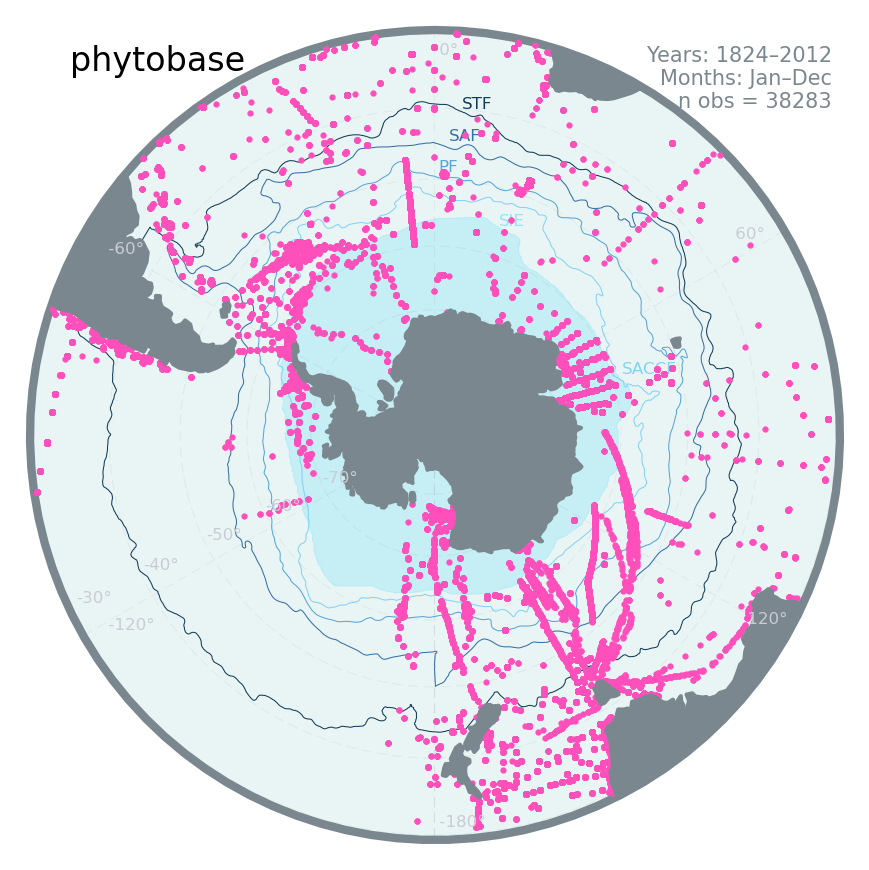

In [11]:
############ DATA TO PLOT ################################################
dataset        = phytobase_occurrence
data_longitude = dataset.longitude
data_latitude  = dataset.latitude
############ SET UP PLOT ################################################
#### COLORS
data_point_color = '#FF4FBB'
#### FIGURE SIZE
fig_width  = 3   # inches
fig_height = 3   # inches
markersize = 1
#### CREATE FIGURE
fig  = plt.figure(figsize=[fig_width, fig_height], dpi=300) # inches
ax1  = plt.subplot(projection = map_setup.map_proj)
############ CREATE MAP ################################################
# Make map
map_setup.map_southern_ocean_axes_setup(ax1, fig, add_gridlines=True)
# Add fronts to map
map_setup.add_fronts(ax1, add_labels=True, front_linewidth=0.25, fontsize=4)
# Add land after front
ax1.add_feature(cfeature.LAND, zorder=7, linewidth = 1, edgecolor=map_setup.overplot_label_color, facecolor=map_setup.overplot_label_color)
############ ADD DATA TO MAP ################################################
plt.scatter(x=data_longitude, y=data_latitude, c=data_point_color, transform=map_setup.text_proj, zorder=6, s=markersize, linewidths=0.5)
############ FORMAT TITLE ###################################################
# Get source name and number of observations
source_name_title = np.unique(dataset.source_name)[0]
n_obs = len(dataset)
# Find range of years
first_year = dataset["date_time"].dt.year.min().astype(int).astype(str)
last_year  = dataset["date_time"].dt.year.max().astype(int).astype(str)

if first_year != last_year:
    years = first_year + u'\u2013' + last_year
else:
    years = first_year
        
first_month = dataset.date_time.dt.month.min().astype(int)
last_month  = dataset.date_time.dt.month.max().astype(int)

months = calendar.month_abbr[first_month] + u'\u2013' + calendar.month_abbr[last_month]

plt.title(source_name_title, loc='left', x=0.05, y=.95, va='top', fontsize=8)
plt.title('Years: ' + years + '\nMonths: ' + months + '\nn obs = ' + str(n_obs), fontsize=5, loc='right', x=0.99, y=0.95, color=map_setup.overplot_label_color, va='top')
plt.show()

In [12]:
phytobase_occurrence.to_csv("../../data/datasets/modified/phytobase/phytobase_occurrence.csv", index=False)

In [14]:
x = 7
type([x])

list